In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot, init_notebook_mode
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
%matplotlib inline


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

db = pd.read_csv("Hotel_Reviews.csv")


In [26]:
print(db.columns)



Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username', 'sourceURLs', 'websites'],
      dtype='object')


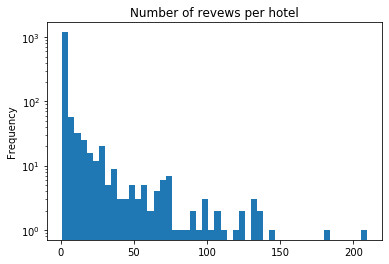

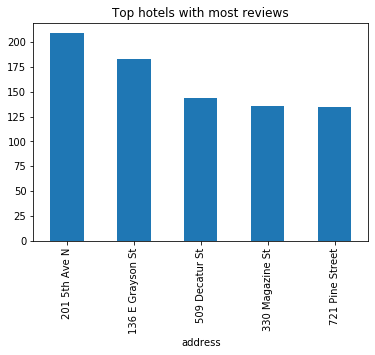

In [27]:

da = db.groupby( 'address' ).count()
# Distribution on the number of review log-scale
da.sort_values("id", ascending=False, ).plot.hist(y="id",bins=50, logy=True, legend=False,title="Number of revews per hotel")
# Top hotels with most reviews
da.sort_values("id", ascending=False).head().plot.bar(y="id", legend=False,title="Top hotels with most reviews")


count    10000.000000
mean         4.084100
std          1.152371
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: reviews.rating, dtype: float64


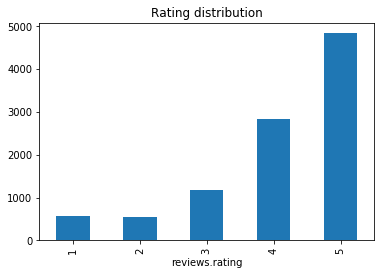

In [28]:
# Print statistic info on reviews rating
print(db.describe()["reviews.rating"])
# Distribution on the rating
da = db.groupby( 'reviews.rating' ).count()
da.plot.bar(y="id", legend=False,title="Rating distribution")

count    1433.000000
mean        3.925243
std         1.134424
min         1.000000
25%         3.333333
50%         4.000000
75%         5.000000
max         5.000000
Name: reviews.rating, dtype: float64


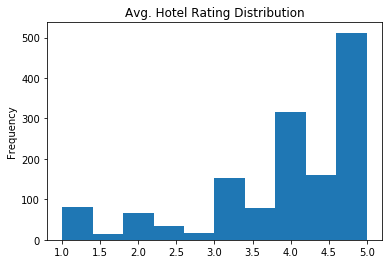

In [29]:
# Rating distribution per hotel
dh = db.groupby(['longitude','latitude'] ).mean()
print(dh.describe()['reviews.rating'])
dh.plot.hist(y="reviews.rating", legend=False,title="Avg. Hotel Rating Distribution", bins=10)

count    46.000000
mean      3.989385
std       0.598077
min       1.000000
25%       3.890071
50%       4.116071
75%       4.279522
max       4.512821
Name: reviews.rating, dtype: float64


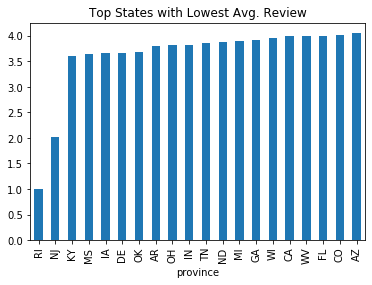

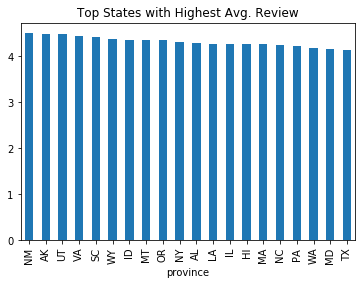

In [30]:
# Rating distribution for province
dh = db.groupby(['province'] ).mean()
print(dh.describe()['reviews.rating'])
dh.sort_values('reviews.rating').head(20).plot.bar(y="reviews.rating", legend=False,title="Top States with Lowest Avg. Review")
dh.sort_values('reviews.rating', ascending=False).head(20).plot.bar(y="reviews.rating", legend=False,title="Top States with Highest Avg. Review")

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (2,2), max_features=20000)
da = db.copy();
text_tf= tf.fit_transform(da['reviews.text'])

features=tf.get_feature_names()
features

['00 day',
 '00 morning',
 '00 night',
 '00 pm',
 '10 00',
 '10 000',
 '10 10',
 '10 11',
 '10 12',
 '10 15',
 '10 30',
 '10 30pm',
 '10 blocks',
 '10 day',
 '10 days',
 '10 discount',
 '10 hotel',
 '10 hours',
 '10 min',
 '10 mins',
 '10 minute',
 '10 minutes',
 '10 night',
 '10 nights',
 '10 parking',
 '10 pm',
 '10 room',
 '10 year',
 '10 years',
 '100 00',
 '100 night',
 '100 years',
 '101 exceed',
 '10th floor',
 '11 00',
 '11 15',
 '11 30',
 '11 pm',
 '11th floor',
 '12 00',
 '12 15',
 '12 day',
 '12 months',
 '12 nights',
 '12 noon',
 '12 pm',
 '12 year',
 '12th floor',
 '13 year',
 '14 night',
 '14th floor',
 '15 20',
 '15 day',
 '15 min',
 '15 mins',
 '15 minute',
 '15 minutes',
 '15 night',
 '15 parking',
 '15 years',
 '15th floor',
 '16 day',
 '16th floor',
 '17 day',
 '17th floor',
 '19 day',
 '1920 building',
 '19th floor',
 '1st floor',
 '1st night',
 '1st time',
 '20 00',
 '20 25',
 '20 30',
 '20 breakfast',
 '20 bucks',
 '20 day',
 '20 hours',
 '20 min',
 '20 mins',
 '2

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, da['reviews.rating']>3, test_size=0.2, random_state=0)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Model Generation Using Logistic Regression
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
predicted= clf.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))

Logistic Regression Accuracy: 0.812


In [34]:
keywords = pd.DataFrame( {"coefficient":clf.coef_[0]}, index=features).sort_values('coefficient')

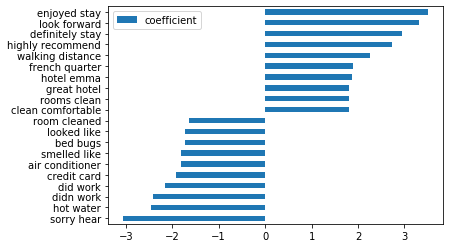

In [35]:
index1 = keywords.index[:10]
index2 = keywords.index[-10:]
keywords.loc[ index1 | index2 ].sort_values('coefficient').plot.barh(y='coefficient')

In [36]:
!pip install wordcloud 


In [37]:
positive_review = ' '.join(db[db["reviews.rating"]>3]["reviews.text"])
negative_review = ' '.join(db[db["reviews.rating"]<3]["reviews.text"])

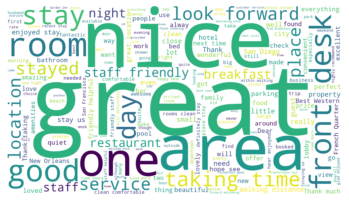

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)
stopwords.update(["hotel", "room"])

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, width = 1920, height = 1080,background_color="white").generate(positive_review)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("positive_review.png")


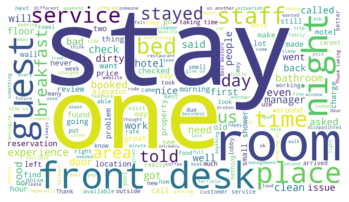

In [39]:
# Create and generate a word cloud image:
wordcloud_neg = WordCloud(stopwords=stopwords, width = 1920, height = 1080,background_color="white").generate(negative_review)

stopwords = set(STOPWORDS)
stopwords.update(["hotel", "room","stay"])

# Display the generated image:
plt.imshow( wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("negative_review.png")